***EXPECTATION MAXIMIZATION***


La función de verosimilitud para un modelo de mezcla gaussiana se define como:

\begin{equation*}
\mathcal{L}(\Theta | X) = \prod_{i=1}^{N} \sum_{k=1}^{K} \pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k)
\end{equation*}

Donde:

- $L(\Theta | X)$ es la función de verosimilitud con respecto a los parámetros $\Theta$ dado el conjunto de datos $X$.

-  $N$ es el número de observaciones en el conjunto de datos.

-  $K$ es el número de componentes en la mezcla gaussiana.

-  $\pi_k$ es el coeficiente de mezcla de la componente $k$.

-  $\mu_k$ es el vector de medias de la componente $k$.

-  $\Sigma_k$ es la matriz de covarianza de la componente $k$.

-  $N(x | \mu, \Sigma)$ es la función de densidad de probabilidad de una distribución gaussiana multivariada con media $\mu$ y matriz de covarianza $\Sigma$.

El objetivo es maximizar esta función de verosimilitud con respecto a los parámetros $\Theta$, que incluyen las medias $\mu_k$, las covarianzas $\Sigma_k$, y los coeficientes de mezcla $\pi_k$.



In [2]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

def charge_data(cant_dat,filename):
    with open (filename,'r') as f:
        lineas = f.readlines()
        for l in lineas:
            l= l.strip().split(',')
            for data_type in cant_dat:
                if l[0] == data_type:
                    cant_dat[data_type][0].append(int(l[1]))
                    cant_dat[data_type][1].append(int(l[2]))

#cargar la data del dataset
data = {'C1':[[],[]],'C2':[[],[]]} 
charge_data(data,'datos.csv')
largos = data['C1'][0] + data['C2'][0]
anchos = data['C1'][1] + data['C2'][1]



**paso 1: Inicializar las medias $\mu_k$, covarianzas $\Sigma_k$, y coeficientes de mezcla $\pi_k$, y evaluar el valor inicial de la log-verosimilitud.**

La inicialización de los parámetros del modelo de mezcla gaussiana se realiza de la siguiente manera:

- Inicializar las medias: $\mu_k$

- Inicializar las covarianzas: $\Sigma_k$

- Inicializar los coeficientes de mezcla: $\pi_k$


Una vez inicializados los parámetros, se evalúa el valor inicial de la log-verosimilitud. Este valor se obtiene al calcular el logaritmo natural de la función de verosimilitud definida previamente.

\begin{equation*}
\text{Log-Verosimilitud Inicial} = \log\left(\mathcal{L}(\Theta | X)\right)
\end{equation*}

Donde $\mathcal{L}(\Theta | X)$ es la función de verosimilitud definida en la respuesta anterior, y $\Theta$ representa el conjunto de parámetros que incluye las medias, covarianzas y coeficientes de mezcla.



In [3]:
mu = np.array([[20,30], [70,30]])
sigma = np.array([[[1, 0], [0, 0.5]], [[1, 0], [0, 0.5]]])  # definida positiva
pi = np.array([0.4, 0.6])  # suman 1
N = len(largos)
K = 2
mus, sigmas, pis,log_likelihoods = [], [], [],[]

**Paso E: Evaluación de las responsabilidades**

En el paso de Expectation (E-step) de un algoritmo EM para un modelo de mezcla gaussiana, se calculan las responsabilidades $\gamma(z_{nk})$  utilizando los valores actuales de los parámetros. Las responsabilidades indican la probabilidad de que una observación $x_n$ pertenezca a la componente $k$ 

La fórmula para calcular las responsabilidades es la siguiente:

\begin{equation*}
\gamma(z_{nk}) = \frac{\pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(x_n | \mu_j, \Sigma_j)}
\end{equation*}


Donde:
- $\gamma(z_{nk})$ es la responsabilidad de la componente $k$ para la observación $x_n$.
- $\pi_k$ es el coeficiente de mezcla de la componente $k$.
- $\mathcal{N}(x_n | \mu_k, \Sigma_k)$ es la función de densidad de probabilidad de una distribución gaussiana multivariada con media $\mu_k$ y matriz de covarianza $\Sigma_k$.
- $K$ es el número de componentes en la mezcla gaussiana.

Este cálculo se realiza para cada observación $x_n$ y cada componente $k$.



In [4]:
def E_step(largos, anchos, mu, sigma, pi, K):
    N = len(largos)
    responsibilities = np.zeros((N, K))
    for i in range(N):
        for j in range(K):
            responsibilities[i, j] = pi[j] * multivariate_normal.pdf([largos[i], anchos[i]], mu[j], sigma[j])
        if np.sum(responsibilities[i, :]) != 0:
            responsibilities[i, :] /= np.sum(responsibilities[i, :])
        else:
            responsibilities[i, :] = 1/K
    return responsibilities


**Paso M: Reestimación de los parámetros**

En el paso de Maximization (M-step) de un algoritmo EM para un modelo de mezcla gaussiana, se reestiman los parámetros utilizando las responsabilidades actuales $gamma(z_{nk})$).

Las fórmulas para la reestimación son las siguientes:

\begin{equation*}
    \mu_{\text{new}_k} = \frac{\sum_{n=1}^{N} \gamma(z_{nk}) x_n}{N_k}
\end{equation*}

\begin{equation*}
    \Sigma_{\text{new}_k} = \frac{\sum_{n=1}^{N} \gamma(z_{nk}) (x_n - \mu_{\text{new}_k})^T (x_n - \mu_k)}{N_k}
\end{equation*}

\begin{equation*}
    \pi_{\text{new}_k} = \frac{N_k}{N}
\end{equation*}

Donde:
- $\N$ es el número total de observaciones.
- $\N_k$ se calcula como $\N_k = \sum_{n=1}^{N} \gamma(z_{nk})$.
- $\mu_{\text{new}_k}$ es la nueva estimación de la media para la componente $k$.
- $\Sigma_{\text{new}_k}$ es la nueva estimación de la matriz de covarianza para la componente $k$.
- $\pi_{\text{new}_k}$ es la nueva estimación del coeficiente de mezcla para la componente $k$.
- $x_n$ es la observación $n-ésima$.

Estas fórmulas se utilizan para actualizar las estimaciones de las medias $\mu$, covarianzas $\Sigma$, y coeficientes de mezcla $\pi$ basándose en las responsabilidades calculadas en el paso E.


In [5]:

def M_step(largos, anchos, mu, sigma, pi, K, responsibilities):
    new_mu = np.zeros((K, 2))
    new_sigma = np.zeros((K, 2, 2))
    new_pi = np.zeros(K)
    for k in range(K):
        new_mu[k] = np.sum(responsibilities[:, k][:, np.newaxis] * np.array([largos, anchos]).T, axis=0) / np.sum(responsibilities[:, k])
        new_sigma[k] = np.zeros((2, 2))
        for n in range(len(largos)):
            new_sigma[k] += responsibilities[n, k] * np.outer(np.array([largos[n], anchos[n]]) - new_mu[k], np.array([largos[n], anchos[n]]) - new_mu[k])
        new_sigma[k] /= np.sum(responsibilities[:, k])
        new_pi[k] = np.sum(responsibilities[:, k]) / len(largos)
    mus.append(new_mu)
    sigmas.append(new_sigma)
    pis.append(new_pi)
    return new_mu, new_sigma, new_pi

## Evaluar la log-verosimilitud

La log-verosimilitud se calcula mediante la siguiente fórmula:

\begin{equation*}
\ln p(X | \mu, \Sigma, \pi) = \sum_{n=1}^{N} \ln\left(\sum_{k=1}^{K} \pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)\right)
\end{equation*}

Donde:
- $\N$ es el número total de observaciones.
- $K$ es el número de componentes en la mezcla gaussiana.
- $\pi_k$ es el coeficiente de mezcla de la componente $k$ .
- $\mathcal{N}(x_n | \mu_k, \Sigma_k)$ es la función de densidad de probabilidad de una distribución gaussiana multivariada con media $\mu_k$ y matriz de covarianza $\Sigma_k$ .
Este cálculo se realiza sumando el logaritmo natural de la función de verosimilitud para cada observación $x_n$ y cada componente $k$.

## Verificación de la Convergencia

Después de calcular la log-verosimilitud, se verifica la convergencia comparando la log-verosimilitud actual con la log-verosimilitud anterior o mediante criterios de convergencia para los parámetros. Si el criterio de convergencia no se satisface, se retorna al paso 2.


In [6]:


def check_loglikelihood (i,tol=1e-4):
    log_likelihood = 0
    for j in range(N):
        log_likelihood += np.log(np.sum([pi[k] * multivariate_normal.pdf([largos[j], anchos[j]], mu[k], sigma[k]) for k in range(K)]))
    log_likelihoods.append(log_likelihood)
    if i > 0 and abs(log_likelihood - log_likelihoods[i - 1])< tol:
        return True
    return False


graficos y cosas bonitas

In [7]:

def plot_data_and_normals(largos, anchos, mu, sigma, pi, i):
    plt.figure(figsize=(8, 6))
    
    plt.scatter(largos, anchos, c='blue', alpha=0.5)
    
    x, y = np.meshgrid(np.linspace(np.min(largos), np.max(largos), 1000), np.linspace(np.min(anchos), np.max(anchos), 1000))
    pos = np.dstack((x, y))
    
    for k in range(len(mu)):
        rv = multivariate_normal(mu[k], sigma[k])
        plt.contour(x, y, rv.pdf(pos), levels= 10, colors=f'C{k}', label=f'Normal {k+1}')
    
    plt.xlabel('Largos')
    plt.ylabel('Anchos')
    plt.legend()
    plt.title(f'Iteracion, {i}' )
    plt.show()




**Let the magic begin**

/tmp/ipykernel_4574/3071894442.py:11: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, rv.pdf(pos), levels= 10, colors=f'C{k}', label=f'Normal {k+1}')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


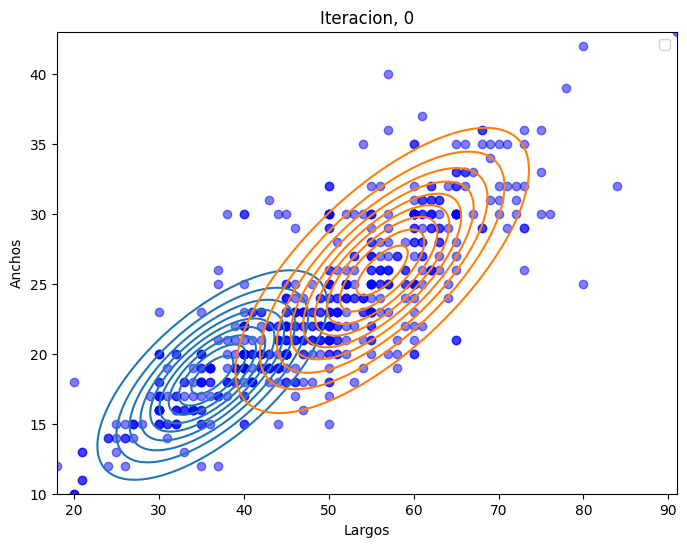

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


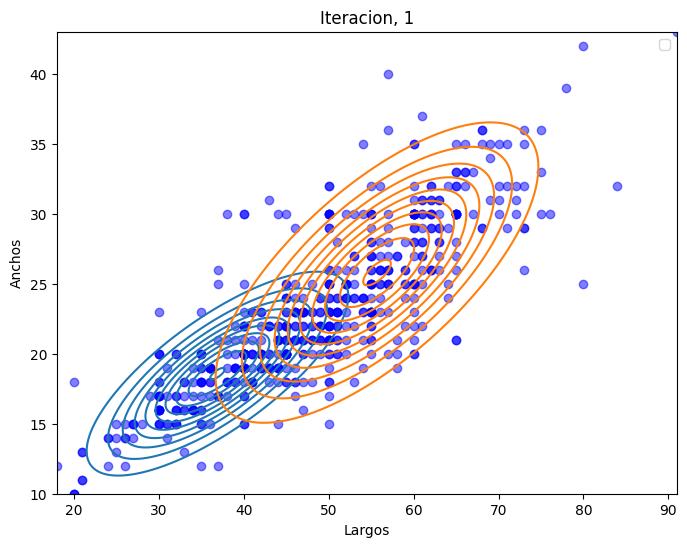

In [9]:

def EM(largos, anchos,max_iters = 100):
    mu = np.array([[20,30], [70,30]])
    sigma = np.array([[[1, 0], [0, 0.5]], [[1, 0], [0, 0.5]]])  # definida positiva
    pi = np.array([0.4, 0.6])  # suman 1
    N = len(largos)
    K = 2
    mus, sigmas, pis,log_likelihoods = [], [], [],[]
    for i in range(max_iters):
        responsibilities = E_step(largos, anchos, mu, sigma, pi, K)
        mu, sigma, pi = M_step(largos, anchos, mu, sigma, pi, K, responsibilities)
        plot_data_and_normals(largos, anchos, mu, sigma, pi, i)
        # Verificar convergencia
        if check_loglikelihood(i):
            break

        
EM(largos, anchos)
